## Imports

In [1]:
# import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import sleep

from random import randint

# set the directory for the data
data_dir = 'Resources'

# set the directory for the output
output_dir = 'Output'

import pathlib
cwd = pathlib.Path().resolve()

### Reading in data

In [2]:

aq_df = pd.read_csv(os.path.join(os.getcwd(), output_dir,'air_quality.csv'))
ev_stations_df = pd.read_csv(os.path.join(os.getcwd(), data_dir, 'Electric_Vehicle_Charging_Stations.csv'))
walkability_df = pd.read_csv(os.path.join(os.getcwd(), data_dir, 'EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv'))
# income_df = pd.read_csv(os.path.join(cwd, data_dir, 'Income.csv'))
vehicle_df = pd.read_csv(os.path.join(os.getcwd(), data_dir, 'Vehicle__Snowmobile__and_Boat_Registrations.csv'))


### Format and clean vehicle registaion data

In [3]:
# format and clean vehicle registaion data

# filter for NY state
ny_vehcile_regestrations_df = vehicle_df[vehicle_df['State'] == 'NY']

# convert dates to datetime
ny_vehcile_regestrations_df['Reg Valid Date'] = pd.to_datetime(ny_vehcile_regestrations_df['Reg Valid Date'])
ny_vehcile_regestrations_df['Reg Expiration Date'] = pd.to_datetime(ny_vehcile_regestrations_df['Reg Expiration Date'])

# filter for vehicles
ny_vehcile_regestrations_df = ny_vehcile_regestrations_df[ny_vehcile_regestrations_df['Record Type'] == 'VEH']

display(ny_vehcile_regestrations_df.value_counts('City'))


C:\Users\Chris\AppData\Local\Temp\ipykernel_12272\3284376526.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_vehcile_regestrations_df['Reg Valid Date'] = pd.to_datetime(ny_vehcile_regestrations_df['Reg Valid Date'])
C:\Users\Chris\AppData\Local\Temp\ipykernel_12272\3284376526.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_vehcile_regestrations_df['Reg Expiration Date'] = pd.to_datetime(ny_vehcile_regestrations_df['Reg Expiration Date'])


City
BROOKLYN          536605
ROCHESTER         310424
BRONX             283219
STATEN ISLAND     282800
NEW YORK          226600
                   ...  
KEW GARDN HLL          1
KEW GARDNS HL          1
KEW GARDNS HLL         1
KEW GARENS             1
ZONE PARK              1
Name: count, Length: 23894, dtype: int64

### Data from the five boros

In [4]:
# get data for all five boroughs
manhattan = ['MANHATTAN', 'NEW YORK', 'BROOKLYN', 'QUEENS', 'BRONX', 'STATEN ISLAND']
brooklyn = ['BROOKLYN', 'BRKLYN']
queens = [
'NEIGHBORHOODS','ALLEY POND PARK','ARVERNE','ASTORIA','ASTORIA HEIGHTS',
'AUBURNDALE','BAY TERRACE','BAYSIDE','BAYSIDE HILLS','BAYSWATER','BEECHHURST',
'BELLAIRE','BELLE HARBOR','BELLEROSE','BELLEROSE MANOR','BREEZY POINT',
'BRIARWOOD','BROAD CHANNEL','BROADWAY-FLUSHING','BROOKVILLE','BROOKVILLE PARK',
'CAMBRIA HEIGHTS','COLLEGE POINT','CORONA','CUNNINGHAM PARK','DITMARS-STEINWAY',
'DOUGLAS MANOR','DOUGLASTON','DOWNTOWN FLUSHING','EAST ELMHURST','EDGEMERE',
'ELMHURST','FAR ROCKAWAY','FLORAL PARK','FLUSHING HEIGHTS',
'FLUSHING MEADOWS CORONA PARK','FOREST HILLS','FOREST HILLS GARDENS',
'FOREST PARK','FORT TILDEN-JACOB RIIS PARKS','FRESH MEADOWS','GLEN OAKS',
'GLENDALE','HAMILTON BEACH''HILLCREST','THE HOLE','HOLLIS','HOLLIS HILLS',
'HOLLISWOOD','HOWARD BEACH','HUNTER \'S POINT','JACKSON HEIGHTS','JAMAICA',
'JAMAICA CENTER''JAMAICA ESTATES','JAMAICA HILLS','KEW GARDENS',
'KEW GARDENS HILLS','KISSENA','KISSENA PARK','LAURELTON''LINDEN HILL',
'LINDENWOOD','LITTLE NECK','LOCUST MANOR','LONG ISLAND CITY','MALBA','MASPETH',
'MEADOWMERE','MIDDLE VILLAGE','MURRAY HILL','NEPONSIT','NEW HYDE PARK',
'NORTH CORONA','OAKLAND GARDENS','OLD HOWARD BEACH','OZONE PARK','POMONOK',
'QUEENS VILLAGE','QUEENSBORO HILL','REGO PARK','RICHMOND HILL',
'RICHMOND HILL EAST','RIDGEWOOD''ROCHDALE','ROCKAWAY BEACH','ROCKAWAY PARK',
'ROSEDALE','ROXBURY','SOUTH JAMAICA','SOUTH OZONE PARK','SOUTH RICHMOND HILL',
'SPRINGFIELD GARDENS','ST. ALBANS','SUNNYSIDE','UTOPIA','WHITESTONE',
'WILLETS POINT','WOODHAVEN','WOODSIDE'
]
bronx = ['BRONX']
staten_island = ['STATEN ISLAND']
borough_data = manhattan + brooklyn + queens + bronx + staten_island



### Car data function

In [5]:
def getCarData(city_names):
    cars = pd.DataFrame()
    for city in city_names:
        cars = pd.concat([cars, ny_vehcile_regestrations_df.loc[ny_vehcile_regestrations_df['City'] == city]])
    cars['VIN'] = cars['VIN'].fillna(value='Unknown')


    # groups by VIN and gets the min and max dates for registration
    cars = cars.groupby('VIN').agg({'Reg Valid Date': 'min', 'Reg Expiration Date': 'max', 'Fuel Type': 'first'})

    # # filter for cars that were registered between 2018 and 2021
    cars = cars.reset_index()

    # # filter for cars that were registered between 2022 and 2024
    cars = cars[(cars['Reg Valid Date'] > '2022-04') & (cars['Reg Valid Date'] < '2024-04')]

    return cars

### Car Data by boro

In [6]:
bronx_cars = getCarData(bronx)
brooklyn_cars = getCarData(brooklyn)
queens_cars = getCarData(queens)
manhattan_cars = getCarData(manhattan)
staten_island_cars = getCarData(staten_island)

### Fuel type by boro

In [7]:
pivot_bronx_cars = pd.pivot_table(data = bronx_cars,values=['VIN'],index = ['Reg Valid Date'],columns = ['Fuel Type'],aggfunc=['value_counts'])
pivot_bronx_cars = pivot_bronx_cars.droplevel(1,axis='index')
pivot_bronx_cars = pivot_bronx_cars.droplevel(0,axis='columns')
pivot_bronx_cars = pivot_bronx_cars.groupby(pivot_bronx_cars.index.to_period('M'))[['COMP N/G', 'DIESEL', 'ELECTRIC', 'FLEX', 'GAS', 'NONE', 'OTHER','PROPANE']].sum()

pivot_brooklyn_cars = pd.pivot_table(data = brooklyn_cars,values=['VIN'],index = ['Reg Valid Date'],columns = ['Fuel Type'],aggfunc=['value_counts'])
pivot_brooklyn_cars = pivot_brooklyn_cars.droplevel(1,axis='index')
pivot_brooklyn_cars = pivot_brooklyn_cars.droplevel(0,axis='columns')
pivot_brooklyn_cars = pivot_brooklyn_cars.groupby(pivot_brooklyn_cars.index.to_period('M'))[['COMP N/G', 'DIESEL', 'ELECTRIC', 'FLEX', 'GAS', 'NONE', 'OTHER','PROPANE']].sum()

pivot_queens_cars = pd.pivot_table(data = bronx_cars,values=['VIN'],index = ['Reg Valid Date'],columns = ['Fuel Type'],aggfunc=['value_counts'])
pivot_queens_cars = pivot_queens_cars.droplevel(1,axis='index')
pivot_queens_cars = pivot_queens_cars.droplevel(0,axis='columns')
pivot_queens_cars = pivot_queens_cars.groupby(pivot_queens_cars.index.to_period('M'))[['COMP N/G', 'DIESEL', 'ELECTRIC', 'FLEX', 'GAS', 'NONE', 'OTHER','PROPANE']].sum()

pivot_manhattan_cars = pd.pivot_table(data = manhattan_cars,values=['VIN'],index = ['Reg Valid Date'],columns = ['Fuel Type'],aggfunc=['value_counts'])
pivot_manhattan_cars = pivot_manhattan_cars.droplevel(1,axis='index')
pivot_manhattan_cars = pivot_manhattan_cars.droplevel(0,axis='columns')
pivot_manhattan_cars = pivot_manhattan_cars.groupby(pivot_manhattan_cars.index.to_period('M'))[['COMP N/G', 'DIESEL', 'ELECTRIC', 'FLEX', 'GAS', 'NONE', 'OTHER','PROPANE']].sum()

pivot_staten_island_cars = pd.pivot_table(data = staten_island_cars,values=['VIN'],index = ['Reg Valid Date'],columns = ['Fuel Type'],aggfunc=['value_counts'])
pivot_staten_island_cars = pivot_staten_island_cars.droplevel(1,axis='index')
pivot_staten_island_cars = pivot_staten_island_cars.droplevel(0,axis='columns')
pivot_staten_island_cars = pivot_staten_island_cars.groupby(pivot_staten_island_cars.index.to_period('M'))[['COMP N/G', 'DIESEL', 'ELECTRIC', 'FLEX', 'GAS', 'NONE', 'OTHER']].sum()


#### Combining all the boros

In [8]:
boros_df = pivot_bronx_cars + pivot_brooklyn_cars + pivot_queens_cars + pivot_manhattan_cars + pivot_staten_island_cars
display(boros_df.info())
display(boros_df.head())

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 24 entries, 2022-04 to 2024-03
Freq: M
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   COMP N/G  24 non-null     float64
 1   DIESEL    24 non-null     float64
 2   ELECTRIC  24 non-null     float64
 3   FLEX      24 non-null     float64
 4   GAS       24 non-null     float64
 5   NONE      24 non-null     float64
 6   OTHER     24 non-null     float64
 7   PROPANE   0 non-null      float64
dtypes: float64(8)
memory usage: 1.7 KB


None

Fuel Type,COMP N/G,DIESEL,ELECTRIC,FLEX,GAS,NONE,OTHER,PROPANE
Reg Valid Date,,,,,,,,
2022-04,0.0,266.0,79.0,5.0,15168.0,2.0,2.0,NaN
2022-05,0.0,703.0,495.0,33.0,56077.0,27.0,14.0,NaN
2022-06,16.0,786.0,735.0,51.0,80139.0,33.0,24.0,NaN
2022-07,0.0,874.0,453.0,29.0,78063.0,36.0,17.0,NaN
2022-08,11.0,810.0,863.0,52.0,85168.0,19.0,14.0,NaN


#### Na count by feature

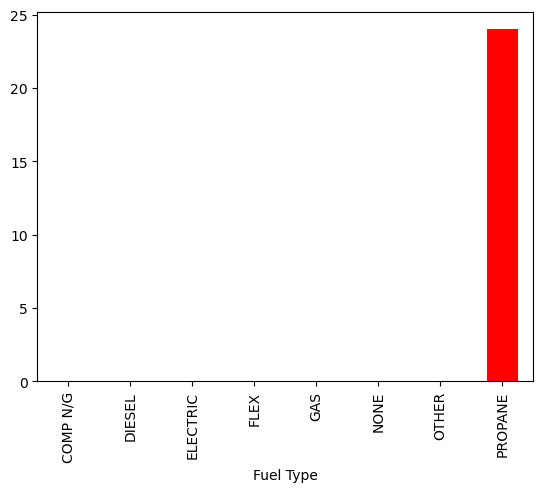

In [9]:
boros_df.isna().sum().plot(kind='bar',color='red')
boros_df.drop(columns = ['PROPANE'],inplace = True)

### Air Quality

In [10]:
aq_df.head()

,DateObserved,HourObserved,LocalTimeZone,ReportingArea,StateCode,Latitude,Longitude,ParameterName,AQI,CategoryNumber,CategoryName,Category
0,2023-01-01,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,54,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"
1,2023-01-15,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,52,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"
2,2023-02-01,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,53,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"
3,2023-02-15,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,53,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"
4,2023-03-01,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,52,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"


#### Setting index

In [11]:
aq_df['DateObserved'] = pd.to_datetime(aq_df['DateObserved'])
aq_df.set_index('DateObserved',inplace=True)

#### AQI Average by month

In [12]:
monthly_aq_df = aq_df.groupby(aq_df.index.to_period('M'))[['AQI']].mean()
monthly_aq_df.head()

,AQI
DateObserved,
2023-01,53.0
2023-02,53.0
2023-03,53.5
2023-04,50.5
2023-05,32.0


#### Subsetting dataframes

In [13]:
boros_df = boros_df['2023-01':'2024-03']	
monthly_aq_df = monthly_aq_df['2023-01':'2024-03']

#### Joining data frames

In [14]:
aq_fuel_df = pd.concat([boros_df,monthly_aq_df], axis=1)
aq_fuel_df.head()

,COMP N/G,DIESEL,ELECTRIC,FLEX,GAS,NONE,OTHER,AQI
2023-01,4.0,718.0,733.0,107.0,79524.0,23.0,26.0,53.0
2023-02,0.0,882.0,847.0,74.0,82309.0,45.0,40.0,53.0
2023-03,6.0,1181.0,1109.0,116.0,111647.0,70.0,50.0,53.5
2023-04,124.0,1258.0,1109.0,118.0,105477.0,44.0,40.0,50.5
2023-05,53.0,2272.0,1370.0,128.0,135523.0,42.0,45.0,32.0


#### Correlation Table

In [15]:
aq_fuel_df.corr()

,COMP N/G,DIESEL,ELECTRIC,FLEX,GAS,NONE,OTHER,AQI
COMP N/G,1.000000,0.278866,-0.124307,0.361177,0.401692,0.305733,0.140663,-0.226526
DIESEL,0.278866,1.000000,0.437911,0.593761,0.521714,0.086320,0.422908,0.024880
ELECTRIC,-0.124307,0.437911,1.000000,0.240023,0.206749,0.012856,0.201856,0.217756
FLEX,0.361177,0.593761,0.240023,1.000000,0.774763,0.356124,0.576093,-0.186743
GAS,0.401692,0.521714,0.206749,0.774763,1.000000,0.527622,0.532163,-0.173908
NONE,0.305733,0.086320,0.012856,0.356124,0.527622,1.000000,0.364242,-0.048640
OTHER,0.140663,0.422908,0.201856,0.576093,0.532163,0.364242,1.000000,-0.501418
AQI,-0.226526,0.024880,0.217756,-0.186743,-0.173908,-0.048640,-0.501418,1.000000


#### Visaulization

<Axes: >

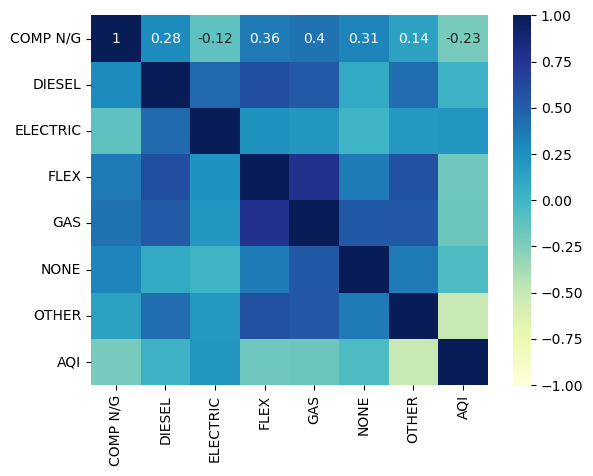

In [16]:
sns.heatmap(aq_fuel_df.corr(),vmin=-1, vmax=1,cmap="YlGnBu",annot=True)

#### Scatter plot of fuel type against 'AQI' with best fitting line

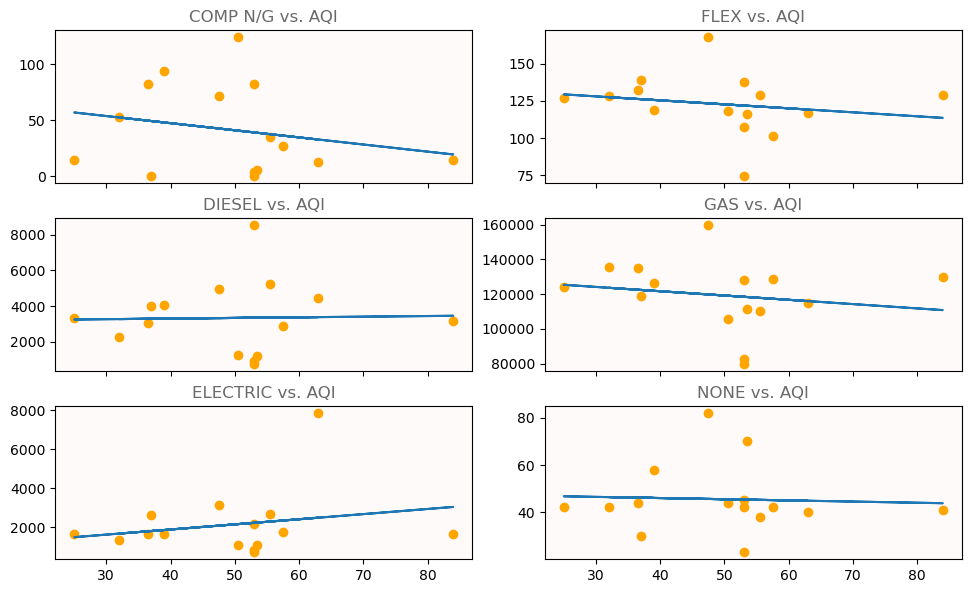

In [47]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(10,6),sharex=True)
fig.tight_layout(pad=1.5)

x = aq_fuel_df['AQI']
row = 0
col = 0 

for fuel in aq_fuel_df.columns[:6]:
    y = aq_fuel_df[fuel].values
    
    #Best fitting line
    a, b = np.polyfit(x, y, 1)

    #Scatterplot
    ax[row,col].scatter(x,y,color = 'orange')

    #Plotting line
    ax[row,col].plot(x, a*x+b)
    
    #Formattig plot
    ax[row,col].set_title(f'{fuel} vs. AQI',color = 'dimgray')
    ax[row,col].set_facecolor('snow')
    
    row+=1
    if row == 3:
        col+=1
        row=0
    